In [ ]:
#Google slides summarizing main results
https://docs.google.com/presentation/d/1L7darcvJRIyNyTp776u8A7puUbsiJMksFIQhpq3H_ow/edit?usp=sharing

In [4]:
import pandas as pd
import math
import numpy as np
from mnist.loader import MNIST
import pandas as pd

In [5]:
def findRegParms(numTimePts,numHidNodes,fileName):
    numEdges = numHidNodes*(numHidNodes-1)
    x = np.empty(numTimePts)
    y = np.empty([numTimePts*numEdges,1])
    for i in range(0,numTimePts):
        x[i]=(i/10)

    with open("C:/Users/Joseph Hwang/Desktop/Sample_Output_Practice/Sample_Output_4/" + fileName) as infile:
    #with open("C:/Users/Joseph Hwang/Desktop/Sample_Output_Practice/Sample_Output_1/" + fileName) as infile:
        i = 0
        for line in infile:
            # print(line.split(" ")[16])
            #y[i]= line.split(" ")[16]
            y[i]= line.split(" ")[0]
            #y[int(floor(i)][i%numEdges]
            i = i + 1
        y = y.reshape((numTimePts, numEdges))
    m, b = np.polyfit(x, y, 1)
    return m,b,y

In [6]:
numTimePts = 21 # number of time points
numHidNodes = 100 # number of hidden nodes
numExamples = 10000 # number of instances you want to process

edge_names = []
for i in range(784,(784+numHidNodes)):
    for j in range((784+numHidNodes-1),783,-1):
        if(i!=j):
            edge_names.append(str(i)+'_'+str(j))

slope_vals = np.empty([numExamples,len(edge_names)])
intercept_vals = np.empty([numExamples,len(edge_names)])
edge_vals = []

for i in range(numExamples):
    #fileName = "temp." + str(i) + ".out"
    fileName = str(i) + ".out"
    slopes, intercepts, edgeWeights = findRegParms(numTimePts,numHidNodes,fileName)
    edge_vals.append(edgeWeights)
    

In [298]:
#df_slopes = pd.DataFrame(list(slope_vals),columns=edge_names)
#df_intercepts = pd.DataFrame(list(intercept_vals),columns=edge_names)
df_edgeWeights = pd.DataFrame(list(edge_vals),columns=edge_names)
#df_combined = pd.concat([df_slopes, df_intercepts], axis=1, join = 'inner')

ValueError: Must pass 2-d input. shape=(10000, 21, 9900)

In [7]:
sum_ex = 0
sum_in = 0
time_inc = 0
ex = []
inh = []
ratio = []
df = pd.DataFrame([])
df2 = pd.DataFrame([])
df3 = pd.DataFrame([])
for instance in range(3):   
    for time in range(numTimePts):
        for x in range(len(edge_vals[instance][time])):
            if edge_vals[instance][time][x] >= 0:
                sum_ex+=edge_vals[instance][time][x]
            elif edge_vals[instance][time][x] < 0:
                sum_in+=edge_vals[instance][time][x]
        ex.append(sum_ex)
        inh.append(sum_in)
        ratio.append(sum_ex/sum_in)
        sum_ex = 0
        sum_in = 0
    df.insert(instance, "instance " + str(instance), ex[time_inc:21 + time_inc])
    df2.insert(instance, "instance " + str(instance), inh[time_inc:21 + time_inc])
    df3.insert(instance, "instance " + str(instance), ratio[time_inc:21 + time_inc])
    time_inc+=21
        

In [70]:
df

,instance 0,instance 1,instance 2
0,7984.097255,7984.097255,7984.097255
1,7984.097255,7984.097255,7984.097228
2,7984.093360,7984.092862,7984.094694
3,7983.880413,7983.858887,7983.939855
4,7982.467239,7982.370387,7982.794919
5,7979.771528,7979.622399,7980.342469
6,7976.282339,7976.110513,7976.960256
7,7972.499355,7972.330924,7973.212962
8,7968.634126,7968.471638,7969.368899
9,7964.741447,7964.580087,7965.477651


In [71]:
df2

,instance 0,instance 1,instance 2
0,-1951.789510,-1951.789510,-1951.789510
1,-1951.789510,-1951.789510,-1951.789510
2,-1951.789231,-1951.789378,-1951.789384
3,-1951.796770,-1951.796892,-1951.792262
4,-1951.892481,-1951.898053,-1951.866483
5,-1952.097750,-1952.105826,-1952.049864
6,-1952.372306,-1952.382500,-1952.314043
7,-1952.677576,-1952.686406,-1952.613853
8,-1952.992189,-1953.003240,-1952.927339
9,-1953.312695,-1953.323256,-1953.245954


In [89]:
np.sum(df_norm_in.iloc[0][0])

-1951.7895102914924

In [86]:
np.mean(df_norm_in.iloc[0][0])

-0.9812918603778242

In [88]:
np.sum(df_norm_in.iloc[20][0])

-1956.966518931249

In [87]:
np.mean(df_norm_in.iloc[20][0])

-0.9760431515866579

In [103]:
for x in range(20):
    print(len(df_norm_in.iloc[x][0]) - 1989)


0
0
0
0
0
1
1
2
3
4
4
8
10
11
12
14
14
14
14
15


In [97]:
len(df_norm_in.iloc[20][0])

7895

In [94]:
-1956.966518931249/2005

-0.9760431515866579

In [91]:
-1951.7895102914924/1989

-0.9812918603778242

In [8]:
norm_ex = []
norm_in = []
time_inc = 0
ex_1 = []
inh_1 = []
df_norm_ex = pd.DataFrame([])
df_norm_in = pd.DataFrame([])

for instance in range(3):   
    for time in range(numTimePts):
        for x in range(len(edge_vals[instance][time])):
            if edge_vals[instance][time][x] >= 0:
                norm_ex.append(edge_vals[instance][time][x])
            elif edge_vals[instance][time][x] < 0:
                norm_in.append(edge_vals[instance][time][x])
        ex_1.append(norm_ex)
        inh_1.append(norm_in)
        norm_ex = []
        norm_in = []
    df_norm_ex.insert(instance, "instance " + str(instance), ex_1[time_inc:21 + time_inc])
    df_norm_in.insert(instance, "instance " + str(instance), inh_1[time_inc:21 + time_inc])
    time_inc+=21
        

In [18]:
weight_change = []
for x in range(len(df_norm_ex)):
    weight_change.append(np.mean(df_norm_ex.iloc[x][0]))

In [22]:
weight_change_inh = []
for x in range(len(df_norm_in)):
    weight_change_inh.append(np.mean(df_norm_in.iloc[x][0]))

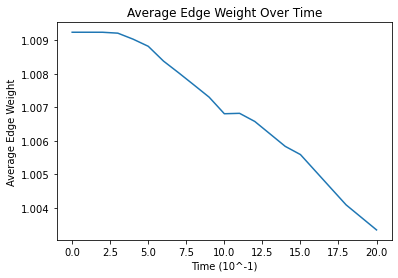

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(21), weight_change)
plt.xlabel("Time (10^-1)")
plt.ylabel("Average Edge Weight")
plt.title("Average Edge Weight Over Time")
plt.savefig("Weight over time 0")

Text(0.5, 1.0, 'Average Edge Weight Over Time')

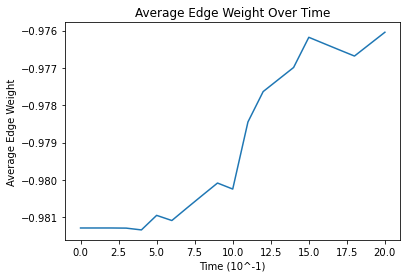

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(21), weight_change_inh)
plt.xlabel("Time (10^-1)")
plt.ylabel("Average Edge Weight")
plt.title("Average Edge Weight Over Time")

Text(0.5, 1.0, 'Average Edge Weight Over Time')

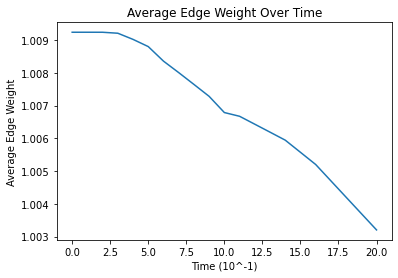

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(21), weight_change)
plt.xlabel("Time (10^-1)")
plt.ylabel("Average Edge Weight")
plt.title("Average Edge Weight Over Time")

Text(0.5, 1.0, 'Average Edge Weight Over Time')

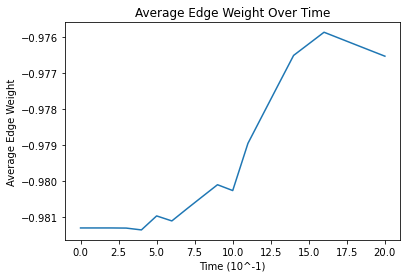

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(21), weight_change_inh)
plt.xlabel("Time (10^-1)")
plt.ylabel("Average Edge Weight")
plt.title("Average Edge Weight Over Time")

Text(0.5, 1.0, 'Average Edge Weight Over Time')

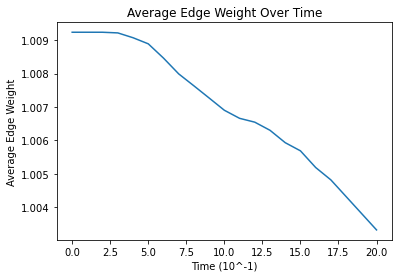

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(21), weight_change)
plt.xlabel("Time (10^-1)")
plt.ylabel("Average Edge Weight")
plt.title("Average Edge Weight Over Time")

Text(0.5, 1.0, 'Average Edge Weight Over Time')

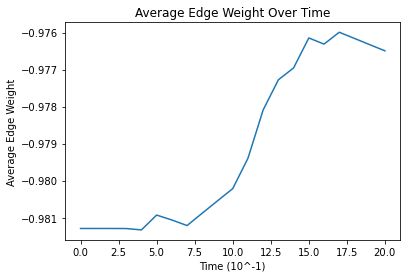

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(21), weight_change_inh)
plt.xlabel("Time (10^-1)")
plt.ylabel("Average Edge Weight")
plt.title("Average Edge Weight Over Time")

In [48]:
weight_change_inh

[-0.9812918603778242,
 -0.9812918603778242,
 -0.9812917969998649,
 -0.981293243602682,
 -0.9813305595318782,
 -0.9809295799999249,
 -0.9810623333174676,
 -0.9812129915797629,
 -0.9808776185839125,
 -0.9805451577370901,
 -0.9802154566299401,
 -0.979395947871756,
 -0.9780893719761203,
 -0.9772762948545416,
 -0.9769548191376307,
 -0.976145337455195,
 -0.9763118920777847,
 -0.9759912742172518,
 -0.9761585703319496,
 -0.9763258802080413,
 -0.976493224243619]

In [25]:
np.mean(df_norm_in.iloc[20][0])

-0.9760431515866579

In [104]:
df_norm_ex_t = df_norm_ex
df_norm_ex_t.insert(0, "time", np.arange(0,21))
df_norm_ex_t = df_norm_ex_t.T

In [105]:
df_norm_in_t = df_norm_in
df_norm_in_t.insert(0, "time", np.arange(0,21))
df_norm_in_t = df_norm_in_t.T

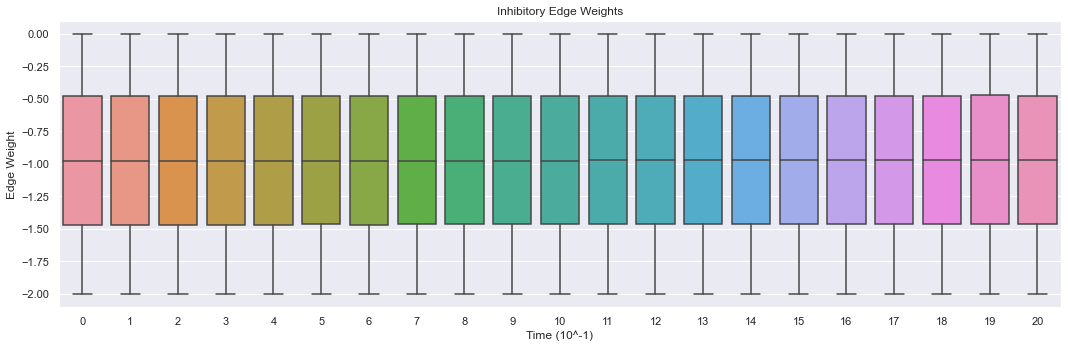

In [106]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(rc={'figure.figsize':(15,5)})
ax = sns.boxplot(data=df_norm_in_t.iloc[1])
ax.set_title("Inhibitory Edge Weights")
ax.set_xlabel("Time (10^-1)")
ax.set_ylabel("Edge Weight")
plt.tight_layout()
plt.savefig("inh_overall_2")

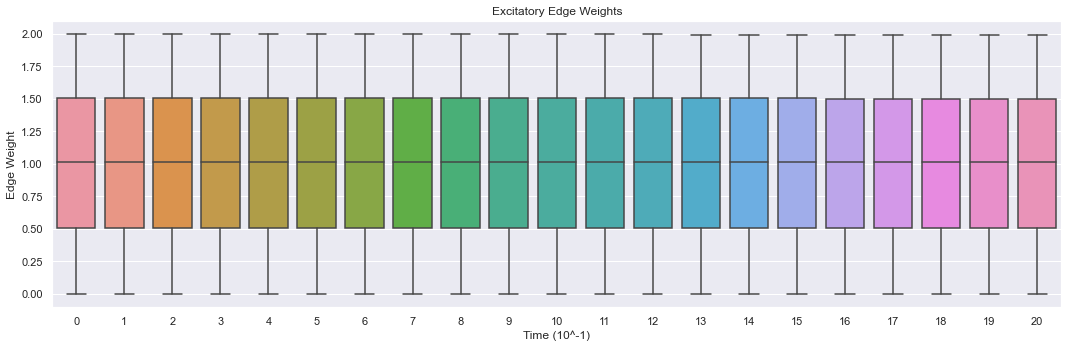

In [91]:
import numpy as np
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(15,5)})
ax = sns.boxplot(data=df_norm_ex_t.iloc[1])
ax.set_title("Excitatory Edge Weights")
ax.set_xlabel("Time (10^-1)")
ax.set_ylabel("Edge Weight")
plt.tight_layout()
plt.savefig("ex_overall_2")

In [110]:
np.mean(df_norm_ex_t.iloc[1][20])

1.003340460977956

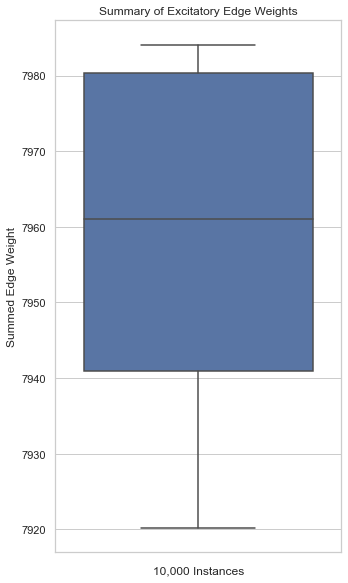

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'figure.figsize':(5,8.27)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(y=ex)
ax.set_title("Summary of Excitatory Edge Weights")
ax.set_xlabel("10,000 Instances")
ax.set_ylabel("Summed Edge Weight")
plt.tight_layout()
plt.savefig("ex")

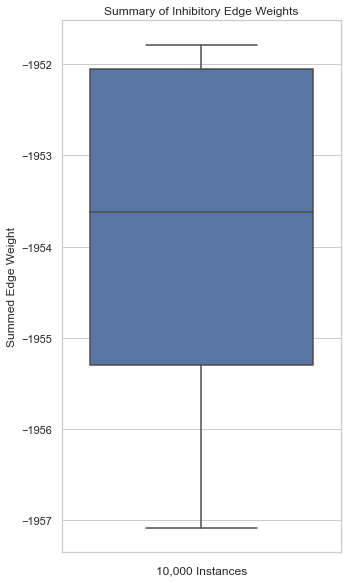

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'figure.figsize':(5,8.27)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(y=inh)
ax.set_title("Summary of Inhibitory Edge Weights")
ax.set_xlabel("10,000 Instances")
ax.set_ylabel("Summed Edge Weight")
plt.tight_layout()
plt.savefig("inh")

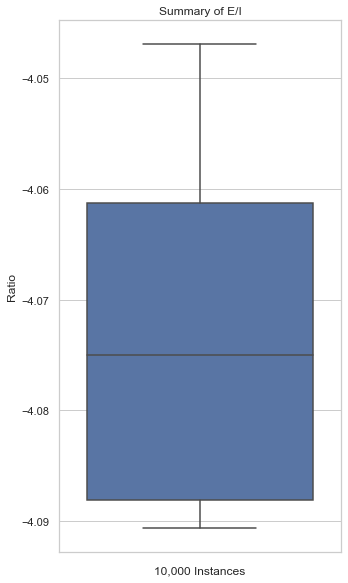

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'figure.figsize':(5,8.27)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(y=ratio)
ax.set_title("Summary of E/I")
ax.set_xlabel("10,000 Instances")
ax.set_ylabel("Ratio")
plt.tight_layout()
plt.savefig("ratio")

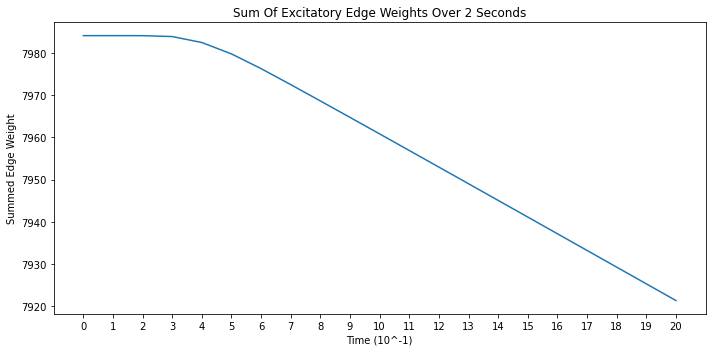

In [16]:
import matplotlib.pyplot as plt
x = np.arange(21)
plt.figure(figsize=(10,5)) 
plt.plot(x, df["instance 0"])
plt.title("Sum Of Excitatory Edge Weights Over 2 Seconds")
plt.xlabel("Time (10^-1)")
plt.locator_params(axis="both", integer=True, tight=True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.ylabel("Summed Edge Weight")
plt.tight_layout()
#plt.savefig("ex_time")
plt.show()

In [13]:
df["instance 0"]

0     7984.097255
1     7984.097255
2     7984.093360
3     7983.880413
4     7982.467239
5     7979.771528
6     7976.282339
7     7972.499355
8     7968.634126
9     7964.741447
10    7960.827814
11    7956.898843
12    7952.968474
13    7949.029144
14    7945.084086
15    7941.138517
16    7937.186332
17    7933.232449
18    7929.284528
19    7925.328592
20    7921.372939
Name: instance 0, dtype: float64

In [14]:
df

,instance 0,instance 1,instance 2
0,7984.097255,7984.097255,7984.097255
1,7984.097255,7984.097255,7984.097228
2,7984.093360,7984.092862,7984.094694
3,7983.880413,7983.858887,7983.939855
4,7982.467239,7982.370387,7982.794919
5,7979.771528,7979.622399,7980.342469
6,7976.282339,7976.110513,7976.960256
7,7972.499355,7972.330924,7973.212962
8,7968.634126,7968.471638,7969.368899
9,7964.741447,7964.580087,7965.477651


In [21]:
df2

,instance 0,instance 1,instance 2
0,-1951.789510,-1951.789510,-1951.789510
1,-1951.789510,-1951.789510,-1951.789510
2,-1951.789231,-1951.789378,-1951.789384
3,-1951.796770,-1951.796892,-1951.792262
4,-1951.892481,-1951.898053,-1951.866483
5,-1952.097750,-1952.105826,-1952.049864
6,-1952.372306,-1952.382500,-1952.314043
7,-1952.677576,-1952.686406,-1952.613853
8,-1952.992189,-1953.003240,-1952.927339
9,-1953.312695,-1953.323256,-1953.245954


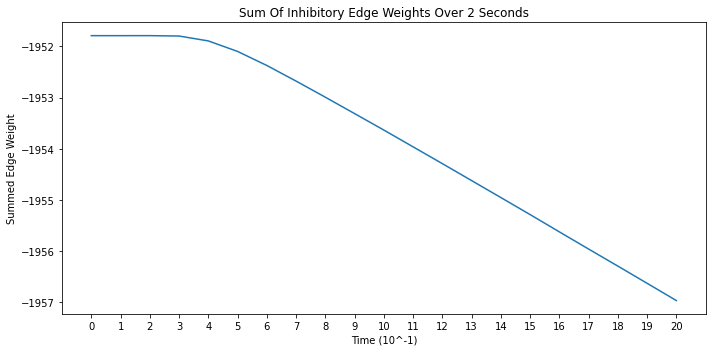

In [20]:
x = np.arange(21)
plt.figure(figsize=(10,5)) 
plt.plot(x, df2["instance 0"])
plt.title("Sum Of Inhibitory Edge Weights Over 2 Seconds")
plt.xlabel("Time (10^-1)")
plt.locator_params(axis="both", integer=True, tight=True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.ylabel("Summed Edge Weight")
plt.tight_layout()
plt.savefig("Inst_2_inh_time")
plt.show()

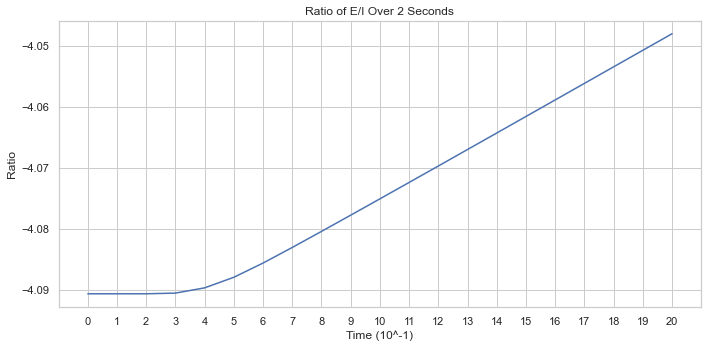

In [296]:
x = np.arange(21)
plt.figure(figsize=(10,5)) 
plt.plot(x, df3.mean(axis=1))
plt.title("Ratio of E/I Over 2 Seconds")
plt.xlabel("Time (10^-1)")
plt.locator_params(axis="both", integer=True, tight=True)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.ylabel("Ratio")
plt.tight_layout()
plt.savefig("Inst_2_E,I_time")
plt.show()

In [195]:
ex

[7984.097254543485,
 7984.097228189265,
 7984.094693706303,
 7983.939854967007,
 7982.794918737307,
 7980.342469349139,
 7976.960256077359,
 7973.212961586129,
 7969.36889889494,
 7965.477651018209,
 7961.56549246893,
 7957.639847374764,
 7953.708692628141,
 7949.772310659459,
 7945.832071694431,
 7941.890284084532,
 7937.944128087514,
 7934.002792478705,
 7930.057513627737,
 7926.111331760844,
 7922.162893216361]

In [196]:
inh

[-1951.7895102914913,
 -1951.7895102914913,
 -1951.7893842327298,
 -1951.7922615257314,
 -1951.8664829089048,
 -1952.0498641998543,
 -1952.3140433017595,
 -1952.6138532437308,
 -1952.9273386005661,
 -1953.2459542122804,
 -1953.5694050634695,
 -1953.894916004152,
 -1954.2225652082866,
 -1954.5525897090854,
 -1954.8865930943973,
 -1955.2191109227547,
 -1955.5527198318018,
 -1955.8865135313715,
 -1956.2217749452245,
 -1956.5570639369143,
 -1956.8924213842133]

In [199]:
ratio

[-4.090654864392162,
 -4.090654864392162,
 -4.0906534537340224,
 -4.090528550241055,
 -4.08960396934285,
 -4.087793005256887,
 -4.085430997461779,
 -4.0828549737691935,
 -4.080218123719137,
 -4.077555769141283,
 -4.074881447383553,
 -4.0721860880974585,
 -4.069491473662144,
 -4.066786156049052,
 -4.064078774136745,
 -4.061369107241541,
 -4.0586464041983135,
 -4.055928172677252,
 -4.053219800487596,
 -4.05050083145512,
 -4.047781534733168,
 -4.090654864392162,
 -4.090654864392162,
 -4.090652892007692,
 -4.090517267019642,
 -4.089542675785222,
 -4.087699700817441,
 -4.085321659544762,
 -4.082750255477035,
 -4.080111837213046,
 -4.0774511153401685,
 -4.074776304385749,
 -4.072090067164789,
 -4.069399194132012,
 -4.066705196113772,
 -4.0640009229082015,
 -4.061297132809346,
 -4.058593013788463,
 -4.055883864580295,
 -4.0531745976939755,
 -4.050468875784915,
 -4.047767757162005]